## ECA

In [1]:
#Load Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
#Read CSV file into Dataframe
ecadf = pd.read_csv('ECA_data.csv')

#Display Dataframe
ecadf

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
0,1,210000,0.000,235822,1,1,1.0,2.0,30,0,...,0,0,0,0,0,0,0,0,0,0
1,2,260000,10928.050,278481,0,0,2.0,2.0,31,0,...,54074,46407,38874,31324,24031,2000,2000,2000,2000,72000
2,3,400000,65397.850,431993,0,0,3.0,1.0,51,0,...,343591,352484,338823,283288,185288,15000,14000,11500,8000,7000
3,4,20000,3695.300,22368,0,0,2.0,1.0,58,-1,...,21470,200,0,28740,1295,0,0,28740,1565,0
4,5,180000,68.250,166900,0,1,2.0,1.0,42,0,...,1260,598,2056,4300,1802,598,2056,4300,1802,3691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18764,18762,220000,33065.900,225862,0,0,3.0,1.0,39,0,...,192815,208365,88004,31237,15980,20000,5003,3047,5000,1000
18765,18763,150000,294.525,149966,0,0,3.0,2.0,43,-1,...,1828,3502,8979,5190,0,3526,8998,129,0,0
18766,18764,30000,623.875,30327,1,0,2.0,2.0,37,3,...,3356,2758,20878,20582,19357,0,22000,4200,2000,3100
18767,18765,80000,0.000,94607,1,0,3.0,1.0,41,-1,...,78379,76304,52774,11855,48944,3409,1178,1926,52964,1804


In [3]:
#Print Columns
print(ecadf.columns)

Index(['ID', 'LIMIT', 'BALANCE', 'INCOME', 'RATING', 'GENDER', 'EDUCATION',
       'MARITAL', 'AGE', 'S1', 'S2', 'S3', 'S4', 'S5', 'B1', 'B2', 'B3', 'B4',
       'B5', 'R1', 'R2', 'R3', 'R4', 'R5'],
      dtype='object')


### Question 2

#### Duplicate Entries

In [4]:
#Identifying duplicated entries within datafram
ecadf.loc[ecadf.duplicated()]

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
132,132,200000,1270.675,188181,0,1,2.0,1.0,40,-1,...,32333,12610,7850,977,9205,13587,7850,0,9205,0
379,378,240000,39804.975,256476,0,1,2.0,2.0,35,0,...,232729,223431,226361,223508,238587,10000,8000,9000,19000,9000
422,420,30000,1883.700,32877,1,1,1.0,2.0,23,2,...,10454,11862,12104,12351,8000,2000,242,247,2000,0


In [5]:
#Drop duplicate entries
ecadf.drop_duplicates(inplace = True)

In [6]:
#Check if duplicated entries are removed
print(len(ecadf))
print('----------')
print(ecadf.loc[ecadf.duplicated()])

18766
----------
Empty DataFrame
Columns: [ID, LIMIT, BALANCE, INCOME, RATING, GENDER, EDUCATION, MARITAL, AGE, S1, S2, S3, S4, S5, B1, B2, B3, B4, B5, R1, R2, R3, R4, R5]
Index: []

[0 rows x 24 columns]


#### Missing Values

In [7]:
#Identifying sum of NULL/NA values in each column
ecadf.isnull().sum(axis = 0)

ID            0
LIMIT         0
BALANCE       0
INCOME        0
RATING        0
GENDER        0
EDUCATION    13
MARITAL      38
AGE           0
S1            0
S2            0
S3            0
S4            0
S5            0
B1            0
B2            0
B3            0
B4            0
B5            0
R1            0
R2            0
R3            0
R4            0
R5            0
dtype: int64

In [8]:
#Drop all NA rows
ecadf = ecadf.dropna(axis = 0)
ecadf.isnull().sum(axis = 0)

ID           0
LIMIT        0
BALANCE      0
INCOME       0
RATING       0
GENDER       0
EDUCATION    0
MARITAL      0
AGE          0
S1           0
S2           0
S3           0
S4           0
S5           0
B1           0
B2           0
B3           0
B4           0
B5           0
R1           0
R2           0
R3           0
R4           0
R5           0
dtype: int64

In [9]:
#Check if rows are dropped
len(ecadf)

18717

#### Extreme Values

In [10]:
#Search for extreme values
ecadf.describe()

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,S5,B1,B2,B3,B4,B5,R1,R2,R4,R5
count,18717.000000,18717.000000,18717.000000,18717.000000,18717.000000,18717.000000,18717.000000,18717.000000,18717.000000,18717.000000,...,18717.000000,18717.000000,18717.000000,18717.000000,18717.000000,18717.000000,1.871700e+04,18717.000000,18717.000000,18717.000000
mean,9382.482342,168309.754768,9135.126690,177817.991184,0.219586,0.617994,1.788054,1.514826,35.572367,0.129081,...,0.039002,50060.936582,48242.362238,45092.442646,41115.996046,39678.976278,6.030960e+03,5654.674520,4768.925415,5192.848801
std,5418.307142,129501.796160,13056.066586,143206.635373,0.413978,0.485891,0.731406,0.519606,9.559773,0.954515,...,0.849472,71982.947123,70374.559702,66159.494890,61741.750777,59953.359712,2.292500e+04,18634.449439,15049.674687,17444.993387
min,1.000000,10000.000000,0.000000,10000.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,...,-1.000000,-69777.000000,-157264.000000,-65167.000000,-81334.000000,-209051.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,4688.000000,50000.000000,644.350000,56428.000000,0.000000,0.000000,1.000000,1.000000,28.000000,0.000000,...,0.000000,3100.000000,2866.000000,2528.000000,1962.000000,1438.000000,1.000000e+03,581.000000,284.000000,223.000000
50%,9383.000000,140000.000000,3975.125000,148174.000000,0.000000,1.000000,2.000000,2.000000,34.000000,0.000000,...,0.000000,21415.000000,20442.000000,19533.000000,18372.000000,17443.000000,2.137000e+03,2000.000000,1505.000000,1550.000000
75%,14077.000000,240000.000000,11986.275000,257209.000000,0.000000,1.000000,2.000000,2.000000,41.000000,0.000000,...,0.000000,65243.000000,62082.000000,57777.000000,50827.000000,49854.000000,5.002000e+03,5000.000000,4072.000000,4100.000000
max,18766.000000,800000.000000,130692.450000,908846.000000,1.000000,1.000000,3.000000,2.000000,199.000000,7.000000,...,7.000000,743970.000000,855086.000000,706864.000000,823540.000000,514975.000000,1.227082e+06,889043.000000,426529.000000,527143.000000


In [11]:
#Identify impossible Ages
ecadf.loc[(ecadf['AGE'] < 1) + (ecadf['AGE'] > 130)]

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
535,533,160000,87.150,178881,0,1,1.0,1.0,199,2,...,135,0,0,0,508,0,0,0,508,1287
664,662,20000,1238.125,10000,0,0,1.0,2.0,-1,0,...,7860,0,0,0,0,0,0,0,0,0
1617,1615,30000,3054.450,18447,0,1,3.0,1.0,199,0,...,18964,20442,21592,23079,24529,1800,1801,2001,2000,2001
4242,4240,360000,2234.400,415985,0,0,1.0,1.0,-1,0,...,0,0,0,0,0,0,0,0,0,0
7833,7831,30000,5063.275,25640,0,1,2.0,1.0,199,2,...,30109,29349,29400,30000,0,0,1000,600,0,0
15358,15356,250000,105.525,255854,0,1,2.0,2.0,-1,0,...,1867,2470,3887,4731,8710,2661,3887,1000,4000,1000
18082,18080,20000,2550.800,17393,0,0,3.0,1.0,199,0,...,16318,17388,17850,17737,27240,1354,2113,1000,1000,1000
18165,18163,240000,39785.550,230383,0,0,1.0,2.0,-1,0,...,231891,240146,245552,91382,93177,12000,10373,3403,4000,4000
18166,18164,70000,811.650,68051,0,0,1.0,2.0,-1,-1,...,323,0,0,0,0,0,0,0,0,0
18282,18280,30000,4679.850,16676,0,0,2.0,2.0,199,0,...,29095,30819,29214,29478,23384,2500,0,910,1000,1000


In [12]:
#Computing Mean Age
meanAge = round(ecadf['AGE'].mean())
print('Average Age: ', meanAge)

Average Age:  36


In [13]:
#Replace all ages -1 and 199 to mean age
ecadf['AGE'] = ecadf['AGE'].replace([-1,199], meanAge)

C:\Users\mkumar\AppData\Local\Temp\ipykernel_28780\4255648356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecadf['AGE'] = ecadf['AGE'].replace([-1,199], meanAge)


In [14]:
#Check if any rows with impossible AGE is left
ecadf.loc[(ecadf['AGE'] < 1) + (ecadf['AGE'] > 130)]

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5


#### Consistent Data Type

In [15]:
#Display all column data types
ecadf.dtypes

ID             int64
LIMIT          int64
BALANCE      float64
INCOME         int64
RATING         int64
GENDER         int64
EDUCATION    float64
MARITAL      float64
AGE            int64
S1             int64
S2             int64
S3             int64
S4             int64
S5             int64
B1             int64
B2             int64
B3             int64
B4             int64
B5             int64
R1             int64
R2             int64
R3            object
R4             int64
R5             int64
dtype: object

In [16]:
#Display non numeric values within R3
ecadf[ecadf['R3'].str.isnumeric().astype(str).str.contains('False')]

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
1800,1798,120000,0.000,132691,0,1,2.0,1.0,28,0,...,0,0,0,0,0,0,0,$0,0,0
1801,1799,90000,14819.175,102269,0,1,2.0,1.0,35,0,...,81491,81003,68764,67957,69313,3914,2774,"$2,620",2640,3000
1802,1800,180000,565.425,208237,0,1,2.0,2.0,25,-1,...,12513,-628,4940,1740,390,0,10000,"$6,000",6000,1567
1803,1801,80000,10594.850,94482,0,1,1.0,2.0,32,0,...,61715,60582,61453,61858,61104,2100,2349,"$2,200",2200,2200
1804,1802,130000,68.250,151746,1,0,2.0,1.0,45,-1,...,390,390,390,390,0,390,390,$390,0,780
1805,1803,230000,3068.100,272850,0,1,1.0,2.0,26,0,...,13033,2688,2688,2688,6393,2688,2688,"$2,688",6393,6504
1806,1804,130000,629.475,144059,1,1,1.0,2.0,26,-1,...,4398,3738,1396,13069,1285,3746,1396,"$13,069",1285,1034
1807,1805,190000,30804.900,223013,0,0,2.0,2.0,33,0,...,166336,162100,155584,157988,154366,8004,5500,"$7,000",6000,5000
1808,1806,210000,31937.675,207501,0,1,1.0,2.0,31,0,...,187796,190227,127436,129714,131440,8000,5000,"$5,000",5000,5000
1809,1807,20000,1972.425,11639,0,1,3.0,1.0,52,0,...,13513,12999,14456,16313,15766,0,1686,"$2,089",0,0


In [17]:
#Remove '$' and ',' signs in R3
ecadf['R3'] = ecadf['R3'].str.replace('$', '')
ecadf['R3'] = ecadf['R3'].str.replace(',', '')

C:\Users\mkumar\AppData\Local\Temp\ipykernel_28780\2285840163.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ecadf['R3'] = ecadf['R3'].str.replace('$', '')
C:\Users\mkumar\AppData\Local\Temp\ipykernel_28780\2285840163.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecadf['R3'] = ecadf['R3'].str.replace('$', '')
C:\Users\mkumar\AppData\Local\Temp\ipykernel_28780\2285840163.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [18]:
#Display non numeric values within R3 (CHECK)
ecadf[ecadf['R3'].str.isnumeric().astype(str).str.contains('False')]

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5


In [19]:
#Convert data type to int
ecadf['R3'] = pd.to_numeric(ecadf['R3'])

C:\Users\mkumar\AppData\Local\Temp\ipykernel_28780\2145759679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecadf['R3'] = pd.to_numeric(ecadf['R3'])


In [20]:
#Display data types
ecadf.dtypes

ID             int64
LIMIT          int64
BALANCE      float64
INCOME         int64
RATING         int64
GENDER         int64
EDUCATION    float64
MARITAL      float64
AGE            int64
S1             int64
S2             int64
S3             int64
S4             int64
S5             int64
B1             int64
B2             int64
B3             int64
B4             int64
B5             int64
R1             int64
R2             int64
R3             int64
R4             int64
R5             int64
dtype: object

### Question 3

### Histogram

In [21]:
#Determine Min and Max data
ecadf['INCOME'].describe()

count     18717.000000
mean     177817.991184
std      143206.635373
min       10000.000000
25%       56428.000000
50%      148174.000000
75%      257209.000000
max      908846.000000
Name: INCOME, dtype: float64

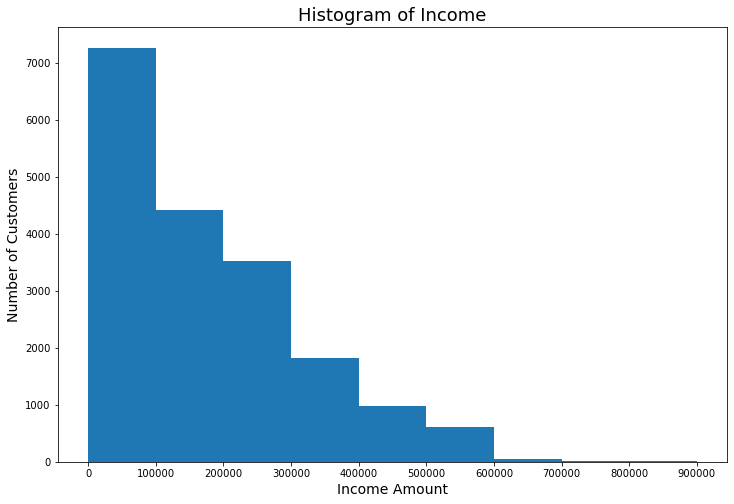

In [22]:
#Plot Histogram

#Create bin for income based on min and max
incomeBin = np.arange(0, 1000000, 100000)

plt.figure(figsize=(12,8))
plt.hist(ecadf['INCOME'], bins=incomeBin)
plt.title('Histogram of Income', fontsize = 18)
plt.xlabel('Income Amount', fontsize = 14)
plt.ylabel('Number of Customers', fontsize = 14)
plt.xticks(ticks=incomeBin)

plt.show()

### Bar Chart

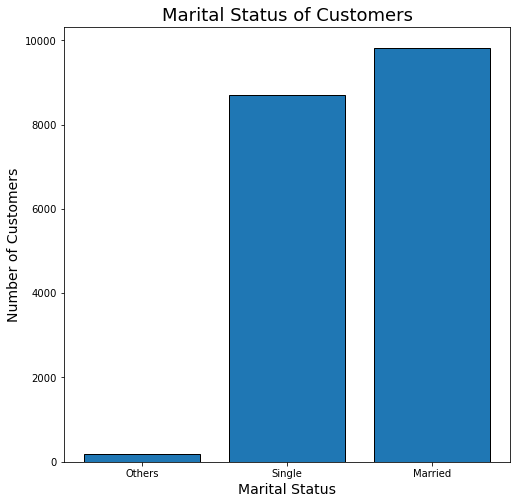

In [23]:
#Plot Bar Chart
Others = sum(ecadf['MARITAL']==0)
Single = sum(ecadf['MARITAL']==1)
Married = sum(ecadf['MARITAL']==2)

y_bar = ('Others','Single','Married')
x_bar = (Others,Single,Married)
 
bar = plt.figure(figsize =(8, 8))

plt.bar(y_bar,x_bar, edgecolor="black")
plt.xlabel("Marital Status", fontsize = 14)
plt.ylabel("Number of Customers", fontsize = 14)
plt.title("Marital Status of Customers", fontsize = 18)

#Show Plot
plt.show()

### Clustered Bar Chart

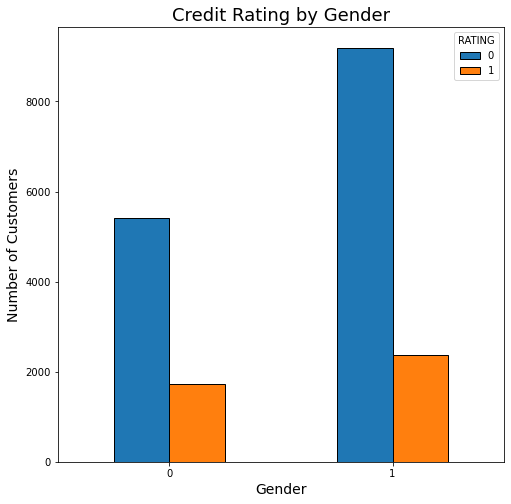

In [24]:
#Plot Clustered Bar Chart
fig, ax = plt.subplots(figsize=(8,8))

ecadf_clustered = ecadf.groupby('GENDER')['RATING'].value_counts().unstack().fillna(0).astype(int)
ecadf_clustered.plot(kind='bar', ax=ax, edgecolor="black")

plt.xlabel('Gender', fontsize=14)
plt.xticks(rotation=0)
plt.ylabel('Number of Customers', fontsize=14)
plt.title('Credit Rating by Gender', fontsize=18)

#Show Plot
plt.show()

### Pie Chart

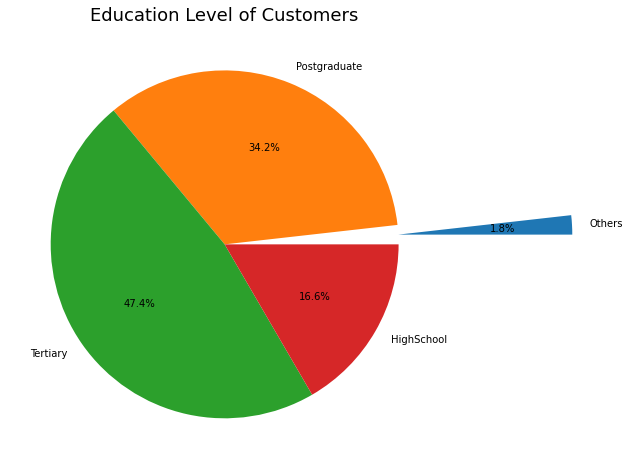

In [25]:
#Plot Pie Chart
Others = sum(ecadf['EDUCATION']==0)
Postgraduate = sum(ecadf['EDUCATION']==1)
Tertiary = sum(ecadf['EDUCATION']==2)
HighSchool = sum(ecadf['EDUCATION']==3)

y_pie = 'Others', 'Postgraduate', 'Tertiary', 'HighSchool'
x_pie = [Others, Postgraduate, Tertiary, HighSchool]

def function(percentage):
  return "{:1.1f}%".format(percentage)

fig = plt.figure(figsize =(8,8))
plt.pie(x_pie, labels = y_pie, autopct=lambda percentage: function(percentage),explode=[1,0,0,0])
plt.title('Education Level of Customers', fontsize=18)

#Show Plot
plt.show()

### Box Plot

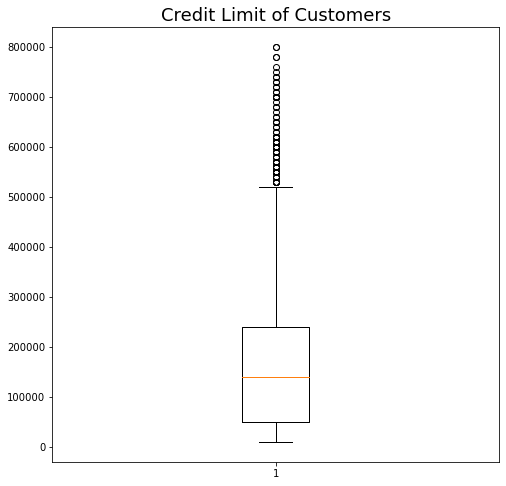

In [26]:
#Plot Box Plot
boxplot = ecadf['LIMIT']
fig = plt.figure(figsize =(8, 8))
 
#Creating plot
plt.boxplot(boxplot)
plt.title("Credit Limit of Customers", fontsize=18)
 
#Show Plot
plt.show()

### Question 4

In [27]:
ecadf.corr() 

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
ID,1.000000,0.048834,0.019613,0.048266,-0.024575,-0.035501,0.002457,-0.011997,0.029953,-0.021187,...,0.017396,0.019156,0.029332,0.010952,0.010344,0.007751,0.031471,0.002278,0.007577,0.011848
LIMIT,0.048834,1.000000,0.288752,0.993756,-0.175701,0.024447,-0.243452,-0.071554,0.141314,-0.233648,...,0.279711,0.283697,0.293774,0.301825,0.297983,0.171778,0.203086,0.202638,0.222892,0.212266
BALANCE,0.019613,0.288752,1.000000,0.286542,-0.022377,-0.034590,-0.009268,-0.015541,0.058353,0.118420,...,0.950942,0.901698,0.861552,0.823850,0.794151,0.110079,0.134404,0.162168,0.155908,0.202665
INCOME,0.048266,0.993756,0.286542,1.000000,-0.173829,0.023753,-0.241543,-0.070597,0.140491,-0.231208,...,0.277517,0.281691,0.291725,0.299626,0.296337,0.169787,0.199384,0.200516,0.222466,0.210874
RATING,-0.024575,-0.175701,-0.022377,-0.173829,1.000000,-0.044348,0.079955,-0.032275,0.019670,0.323366,...,-0.015791,-0.015074,-0.012727,-0.008513,-0.007047,-0.057886,-0.059586,-0.054908,-0.061731,-0.052751
GENDER,-0.035501,0.024447,-0.034590,0.023753,-0.044348,1.000000,0.008958,-0.025182,-0.091869,-0.056689,...,-0.033678,-0.029011,-0.026792,-0.022138,-0.020347,-0.001009,-0.010435,-0.005035,0.004191,-0.001725
EDUCATION,0.002457,-0.243452,-0.009268,-0.241543,0.079955,0.008958,1.000000,-0.167117,0.178158,0.115033,...,-0.010174,-0.011737,-0.019882,-0.024129,-0.018005,-0.037350,-0.061348,-0.046810,-0.053616,-0.050138
MARITAL,-0.011997,-0.071554,-0.015541,-0.070597,-0.032275,-0.025182,-0.167117,1.000000,-0.455065,-0.001489,...,-0.010995,-0.012210,-0.011165,-0.011740,-0.007380,-0.010104,-0.003082,-0.012816,0.008523,-0.003898
AGE,0.029953,0.141314,0.058353,0.140491,0.019670,-0.091869,0.178158,-0.455065,1.000000,-0.015141,...,0.057968,0.058346,0.058741,0.055756,0.051027,0.018245,0.024282,0.013739,0.018317,0.017683
S1,-0.021187,-0.233648,0.118420,-0.231208,0.323366,-0.056689,0.115033,-0.001489,-0.015141,1.000000,...,0.116160,0.111120,0.108881,0.115253,0.118181,-0.075160,-0.084805,-0.052638,-0.058903,-0.048915


In [28]:
import pandas as pd

# Sklearn Liraries

#Train Test Split
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score

### Additional Data Preprocessing

In [29]:
#Create a copy the dataframe and assign it to a variable 
train_test = ecadf.copy()

#List out indepedent variables
x = train_test[[
    'B2','B3','B4','B5',
    'BALANCE'
]]

#List of dependent variables (target)
y = train_test['B1'].values

print(x.head())
print(y[0:5])
print(x.shape, y.shape)

       B2      B3      B4      B5   BALANCE
0       0       0       0       0      0.00
1   46407   38874   31324   24031  10928.05
2  352484  338823  283288  185288  65397.85
3     200       0   28740    1295   3695.30
4     598    2056    4300    1802     68.25
[     0  54074 343591  21470   1260]
(18717, 5) (18717,)


In [30]:
#Set Random State and Testing Size 
#Training Size will be 70 and Testing Size will be 30
random_state = 0
test_size = 0.3

#Splitting of data into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = test_size, random_state = random_state
    
)

In [31]:
print(x_train.shape, y_train.shape)

(13101, 5) (13101,)


### Training the Linear Regression Model

In [32]:
#Import Scikit-Learn model type
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [33]:
#Fit line to x_train & y_train dataset
regressor.fit(x_train, y_train)

LinearRegression()

In [34]:
#Identify intercept
print(regressor.intercept_)

199.93759122103074


In [35]:
#Identify slope 
print(regressor.coef_)

[ 0.38944096  0.05173866 -0.02452624  0.0391129   3.1097069 ]


### Conduct Prediction

In [36]:
#Function to calculate score
def calc(slope, intercept, a):
    return slope*a+intercept

b1 = calc(regressor.coef_, regressor.intercept_, 3)
print(b1)

[201.1059141  200.09280721 199.86401251 200.05492991 209.26671191]


In [37]:
b1 = regressor.predict([[0.38944096, 0.05173866, -0.02452624, 0.0391129, 3.1097069]])
print(b1)

[209.76434072]


C:\Users\mkumar\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [38]:
#Conduct prediction on testing dataset
y_pred = regressor.predict(x_test)

In [39]:
#Compare results between prediction of testing results
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

      Actual      Predicted
0          0   63220.629725
1      30246   29569.679357
2     221056  224987.560187
3       8822    4356.989829
4       8455   20132.481746
...      ...            ...
5611       0     199.937591
5612   48302   15568.002602
5613   17536   16079.305740
5614   56998   56766.393932
5615   18944   18455.164928

[5616 rows x 2 columns]


### Evaluate Model

In [40]:
#Import MAE & MSE formula
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [41]:
#Calculating metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [42]:
#Print metric results to 2 decimal place
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 6514.72
Mean squared error: 358270957.01
Root mean squared error: 18928.05


### Multiple Linear Regression

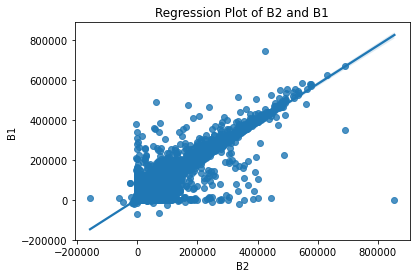

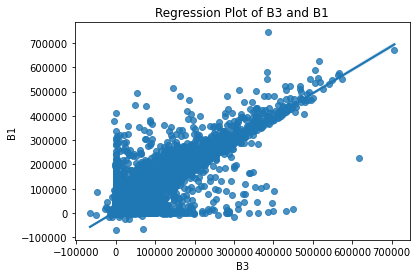

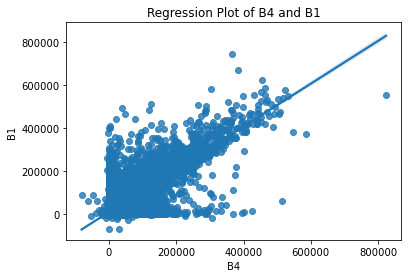

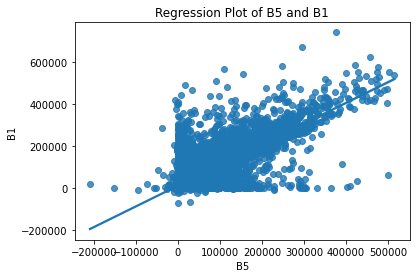

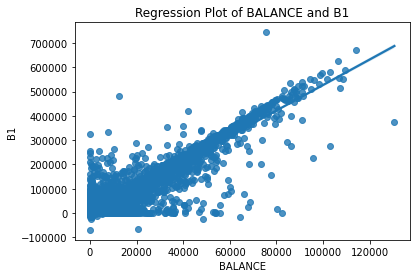

In [43]:
#Import Seaborn for Linear Regression Model
import seaborn as sns

variables = ['B2','B3','B4','B5','BALANCE']

#Plot Regression Model
for v in variables:
    plt.figure() # Creating a rectangle (figure) for each plot
    # Regression Plot also by default includes
    # best-fitting regression line
    # which can be turned off via `fit_reg=False`
    sns.regplot(x=v, y='B1', data=ecadf).set(title=f'Regression Plot of {v} and B1');

### Question 5

### Prepare Data

In [44]:
#Assign x and y variables accordingly
y = ecadf['B1']
X = ecadf[['B2','B3','B4','B5','BALANCE']]

In [45]:
#Divide into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.3, 
                                                    random_state=random_state)

In [46]:
#After training, no need to reshape X data
x.shape

(18717, 5)

In [47]:
#Train model to fit x and y training datasets
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [48]:
#Display Intercept
regressor.intercept_

199.93759122103074

In [49]:
#Display Coefficients of the features
regressor.coef_

array([ 0.38944096,  0.05173866, -0.02452624,  0.0391129 ,  3.1097069 ])

In [50]:
#Display feature column names
feature_names = x.columns
feature_names

Index(['B2', 'B3', 'B4', 'B5', 'BALANCE'], dtype='object')

In [51]:
model_coefficients = regressor.coef_

#Create dataframe to display coefficients
coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coefficient value'])
print(coefficients_df)

         Coefficient value
B2                0.389441
B3                0.051739
B4               -0.024526
B5                0.039113
BALANCE           3.109707


### Make Predictions with Regression Model

In [52]:
#Predict 
y_pred = regressor.predict(x_test)

In [53]:
#Compare actual & predicted results
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

       Actual      Predicted
1425        0   63220.629725
12201   30246   29569.679357
6893   221056  224987.560187
4811     8822    4356.989829
11351    8455   20132.481746
...       ...            ...
134         0     199.937591
1436    48302   15568.002602
17395   17536   16079.305740
6547    56998   56766.393932
3359    18944   18455.164928

[5616 rows x 2 columns]


### Evalute Multiple Linear Regression Model

In [54]:
#Compute  MAE, MSE, RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 6514.72
Mean squared error: 358270957.01
Root mean squared error: 18928.05


In [55]:
#Calculate R2
actual_minus_predicted = sum((y_test - y_pred)**2)
actual_minus_actual_mean = sum((y_test - y_test.mean())**2)
r2 = 1 - actual_minus_predicted/actual_minus_actual_mean
print('R²:', r2)

R²: 0.9278723037210443


In [56]:
#Compute score for testing dataset
regressor.score(x_test, y_test)

0.927872303721044

In [57]:
#Compute score for training dataset
regressor.score(x_train, y_train)

0.9454404541627729